In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

# Load dataset
df = pd.read_csv('../data/GenZ_DatingApp_Data.csv')

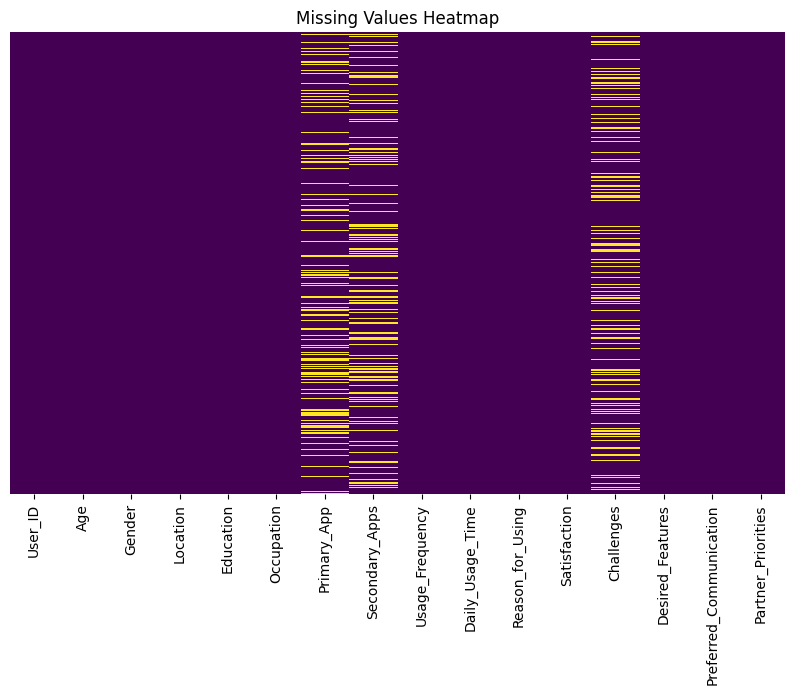

In [2]:
# Identify Missing Values with a Heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cmap='viridis', cbar=False, yticklabels=False)
plt.title("Missing Values Heatmap")
plt.show()

In [3]:
# Decide how to handle missing values
missing_threshold = 0.6  # Drop columns with more than 60% missing values
df = df.dropna(thresh=int((1 - missing_threshold) * df.shape[0]), axis=1)

# Fill missing numerical values with the median
df.fillna(df.median(numeric_only=True), inplace=True)

# Fill missing categorical values with 'None'
df.fillna('None', inplace=True)

# If Primary_App is 'None', set Secondary_App to 'None' and Primary_App to mode
primary_mode = df['Primary_App'].mode()[0]  # Get the most frequent value
df.loc[df['Primary_App'] == 'None', ['Secondary_Apps', 'Primary_App']] = ['None', primary_mode]

In [4]:
# Check for Duplicates
duplicates = df.duplicated().sum()
print(f"Duplicate Rows: {duplicates}")
if duplicates > 0:
    df.drop_duplicates(inplace=True)

Duplicate Rows: 0


In [5]:
# Standardize Categorical Values (Lowercasing, Stripping Spaces)
for col in df.select_dtypes(include=['object']).columns:
    df[col] = df[col].str.lower().str.strip()

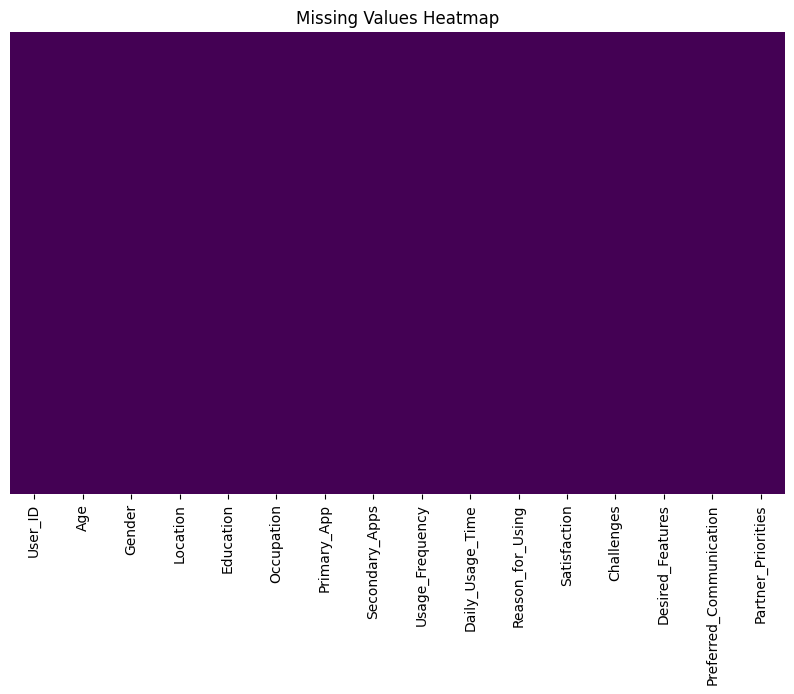

In [6]:
# Identify Missing Values with a Heatmap again
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cmap='viridis', cbar=False, yticklabels=False)
plt.title("Missing Values Heatmap")
plt.show()

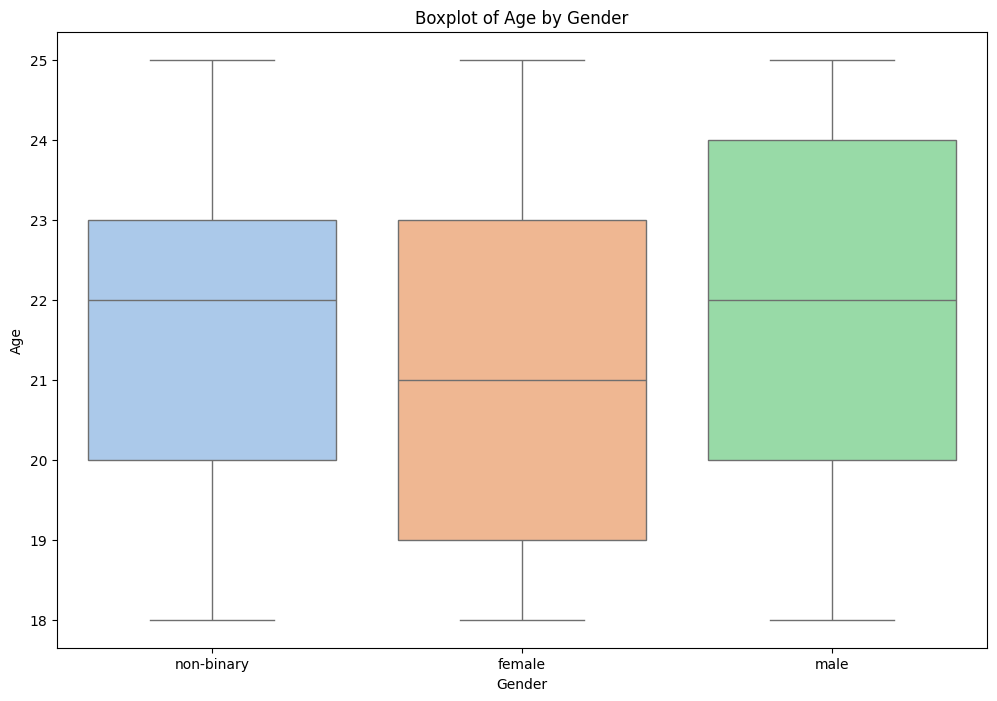

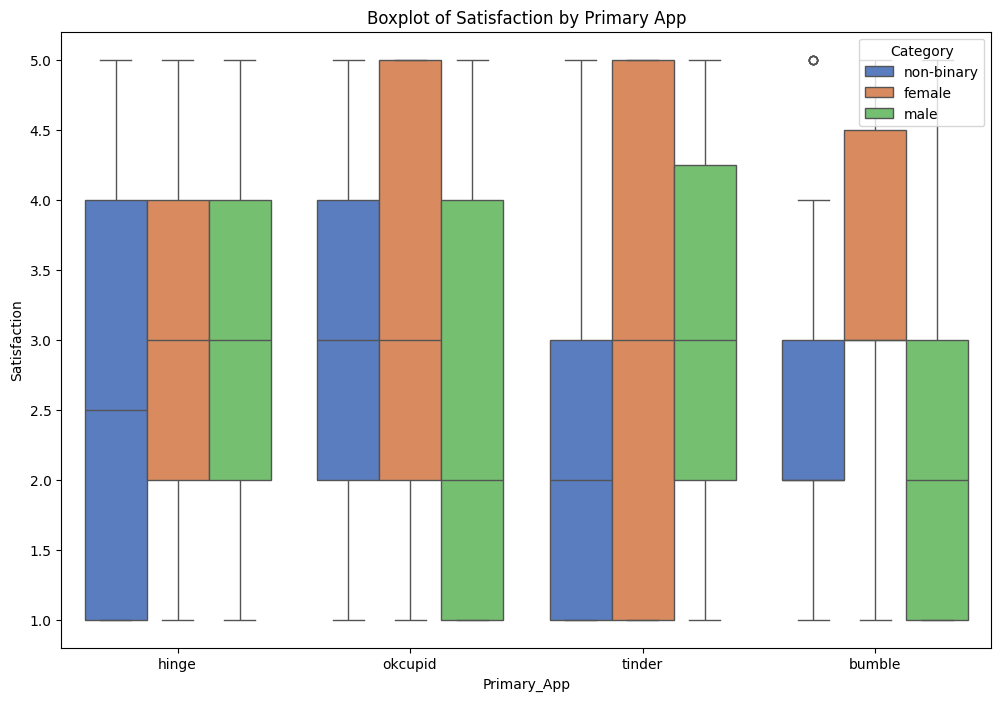

In [7]:

# Detect and Handle Outliers using IQR
for col in df.select_dtypes(include=['number']).columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]

# Boxplot for Gender vs. Age
plt.figure(figsize=(12, 8))
sns.boxplot(x="Gender", y="Age", data=df, palette="pastel", hue="Gender", legend=False)
plt.title("Boxplot of Age by Gender")
plt.show()

# Boxplot for Primary_App vs. Satisfaction Grouped by Gender
plt.figure(figsize=(12, 8))
sns.boxplot(x="Primary_App", y="Satisfaction", data=df, palette="muted", hue="Gender", legend=True)
plt.title("Boxplot of Satisfaction by Primary App")
plt.legend(title="Category", loc="upper right")
plt.show()

In [8]:
# Save cleaned dataset
df.to_csv('../data/cleaned_GenZ_DatingApp_Data.csv', index=False)
print("Cleaned dataset saved as 'cleaned_GenZ_DatingApp_Data.csv'")

Cleaned dataset saved as 'cleaned_GenZ_DatingApp_Data.csv'
